<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat May 11 20:33:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.2.1+cu121
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Medicine: for analyzing medical images. Computer vision can help detect diseases at an early stage by analyzing medical images such as X-rays, MRIs and CT scans.

2. Self-driving cars and similar devices.

3. “Smart city” concept: for automated payment systems, inventory management and customer behavior analysis; traffic surveillance cameras, etc.
_____
  </br>

1. Медицина: для анализа медицинских изображений. Компьютерное зрение может помочь обнаруживать заболевания на ранней стадии при анализе медицинских изображений: рентгеновских снимков, МРТ и КТ.

2. Беспилотные автомобили и подобные устройства.

3. Концепция "умный город": для автоматизированных систем оплаты, управления запасами и анализа поведения покупателей; камеры наблюдения пдд и т.п.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In machine learning, overfitting occurs when an algorithm "learns" its training data too closely, or one might say, completely, resulting in the model being unable to make accurate predictions or inferences from any data other than the training data.
___
</br>

В машинном обучении переобучение происходит, когда алгоритм слишком точно или, можно сказать, полностью "выучивает" свои тренировочные данные, в результате чего модель не может делать точные прогнозы или выводы из любых данных, отличных от тренировочных.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

  - **Cross-validation**:  
  We can divide our data set into k groups (k-fold cross-validation). We let one of the groups be the test set and the rest be the training set, and repeat this process until every single group has been used as the test set.
     
  - **Data augmentation**:
  A larger data set reduces overfitting. If we are unable to collect more data and are limited by the data we have in our current dataset, we can apply data augmentation to artificially increase the size of our dataset.
   
  - **L1 / L2 regularization**:
  Regularization is a method of adding some additional restrictions to a condition in order to solve an incorrectly posed problem or prevent overfitting. In $L1$ or $L2$ regularization, we can add a penalty term to the loss function. $L1$ regularization, also known as _Lasso_, adds a penalty equal to the absolute value of the magnitude of the coefficients. $L2$ regularization, also known as _Ridge_, adds a penalty equal to the square of the magnitude of the coefficients.

  ___
</br>
   
   - **Кросс-валидация (Cross-validation)**:  
   Мы можем разделить наш набор данных на k групп (k-fold cross-validation). Мы позволяем одной из групп быть тестовым набором, а остальным - тренировочным набором, и повторяем этот процесс до тех пор, пока каждая отдельная группа не будет использована в качестве тестового набора.
   
   - **Аугментация данных (Data augmentation)**:  
   Больший набор данных снижает переобучение. Если мы не можем собрать больше данных и ограничены данными, которые у нас есть в нашем текущем наборе данных, мы можем применить аугментацию данных для искусственного увеличения размера нашего набора данных.
   
   - **Регуляризация L1 / L2 (L1 / L2 regularization)**:  
   Регуляризация - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. В регуляризации $L1$ или $L2$ мы можем добавить штрафной член к функции потерь. Регуляризация $L1$, также известная как _Lasso_, добавляет штраф, равный абсолютному значению величины коэффициентов. Регуляризация $L2$, также известная как _Ridge_, добавляет штраф, равный квадрату величины коэффициентов.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it. - ✅

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import matplotlib.pyplot as plt
import torch

from torchvision import datasets, transforms

In [4]:
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transforms.ToTensor())

train_data, test_data

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35990895.95it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1185501.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8676653.33it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10642753.50it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
print(train_data[0][0].shape)
print(train_data[0][0].squeeze().shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


- tensor form `(1, 28, 28)` means:

   **1**: number of channels in the image. For a b&w image = 1. For RGB the number of channels is 3.

   **28**: Image width in pixels.

   **28**: Image height in pixels.


- `squeeze()` is used to remove dimensions of a tensor with length 1.
___
</br>  
- форма тензора `(1, 28, 28)` означает:

  **1**: количество каналов в изображении. Для ч-б изображения = 1. Для RGB количество каналов равняется 3.

  **28**: ширина изображения в пикселях.

  **28**: высота изображения в пикселях.


- `squeeze()` используется для удаления размерностей тензора с длиной 1.

In [7]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

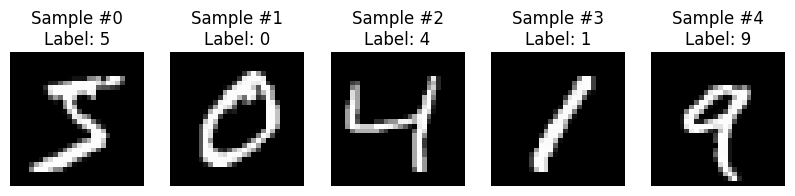

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(train_data[i][0].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"Sample #{i}\nLabel: {train_data[i][1]}")
    axes[i].axis("off")
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
# Create train dataloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

In [10]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7a492671f430>,
 <torch.utils.data.dataloader.DataLoader at 0x7a4926681ab0>)

In [11]:
for sample in next(iter(train_loader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


- `torch.Size([32, 1, 28, 28])`: This is the size of the image tensor in the batch. Here **32** is the batch size (the number of images in the batch), **1** is the number of channels (since the images are black and white), and **28, 28** are the image dimensions (28 pixels by 28 pixels).

- `torch.Size([32])`: This is the size of the torch tensor in the batch. Here **32** is the number of tags in the batch, which corresponds to the number of images in the batch.
___
</br>  
- `torch.Size([32, 1, 28, 28])`: Это размерность тензора изображений в батче. Здесь **32** - это размер батча (количество изображений в батче), **1** - это количество каналов (так как изображения черно-белые), а **28, 28** - это размеры изображения (28 пикселей на 28 пикселей).

- `torch.Size([32])`: Это размерность тензора меток в батче. Здесь **32** - это количество меток в батче, что соответствует количеству изображений в батче.

In [12]:
len(train_loader), len(test_loader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
import torch.nn as nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape=1, hidden_units=128, output_shape=10):
        super(TinyVGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 7 * 7, output_shape)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)
model.to(device)

TinyVGG(
  (features): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [14]:
# Check out the model state dict to find out what patterns our model wants to learn
# model.state_dict()

In [15]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)

# dummy_x.shape
model(dummy_x)

tensor([[ 0.0919,  0.1782,  0.0514, -0.0397, -0.0525, -0.0306,  0.0338, -0.0814,
          0.0204, -0.0428]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [16]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [17]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [18]:
import torch.optim as optim
from torchvision import datasets, transforms
import time


def train_model(model, train_loader, test_loader, criterion, optimizer, device, epochs=5):
    """
    Train a PyTorch model on the specified device (CPU or GPU).

    Args:
        model (nn.Module): The PyTorch model to train.
        train_loader (DataLoader): DataLoader for training data.
        test_loader (DataLoader): DataLoader for test/validation data.
        criterion: Loss function (e.g., nn.CrossEntropyLoss()).
        optimizer: Optimizer (e.g., optim.SGD(model.parameters(), lr=0.1)).
        device (str): 'cpu' or 'cuda' (for GPU).
        epochs (int): Number of training epochs (default is 5).

    Returns:
        data (list): Input images.
        target (list): True labels.
        pred (list): Predicted labels.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)

    if device != "cpu":
        if torch.cuda.is_available():
            print("GPU is available, training is running on GPU.")
            device = "cuda"
        else:
            print("GPU is not available, training is running on the CPU.")
            device = "cpu"
    else:
        device = "cpu"
        print(f"Training is running on '{device}'.")

    model.to(device)
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        epoch_start_time = time.time()

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        model.eval()
        test_loss = 0
        correct = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        test_acc = correct / len(test_loader.dataset)

        epoch_end_time = time.time()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.3f}, "
              f"Accuracy: {test_acc:.3f}, "
              f"Time for epoch: {epoch_end_time - epoch_start_time:.3f} seconds")

    end_time = time.time()
    print(f"Total training time on '{device}': {end_time - start_time:.3f} seconds")

    return data, target, pred

In [19]:
data, target, pred = train_model(model, train_loader, test_loader, nn.CrossEntropyLoss(),
                                 optim.SGD(model.parameters(), lr=0.1), "cpu", epochs=5)

Training is running on 'cpu'.
Epoch 1/5, Loss: 0.237, Accuracy: 0.971, Time for epoch: 31.284 seconds
Epoch 2/5, Loss: 0.057, Accuracy: 0.982, Time for epoch: 22.849 seconds
Epoch 3/5, Loss: 0.142, Accuracy: 0.979, Time for epoch: 22.247 seconds
Epoch 4/5, Loss: 0.049, Accuracy: 0.979, Time for epoch: 22.986 seconds
Epoch 5/5, Loss: 0.047, Accuracy: 0.983, Time for epoch: 29.676 seconds
Total training time on 'cpu': 129.045 seconds


In [20]:
model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)
model.to(device)

TinyVGG(
  (features): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [21]:
data, target, pred = train_model(model, train_loader, test_loader, nn.CrossEntropyLoss(),
                                 optim.SGD(model.parameters(), lr=0.1), "cuda", epochs=5)

GPU is available, training is running on GPU.
Epoch 1/5, Loss: 0.086, Accuracy: 0.969, Time for epoch: 11.185 seconds
Epoch 2/5, Loss: 0.164, Accuracy: 0.979, Time for epoch: 11.059 seconds
Epoch 3/5, Loss: 0.018, Accuracy: 0.982, Time for epoch: 11.419 seconds
Epoch 4/5, Loss: 0.009, Accuracy: 0.980, Time for epoch: 11.571 seconds
Epoch 5/5, Loss: 0.078, Accuracy: 0.982, Time for epoch: 11.040 seconds
Total training time on 'cuda': 56.274 seconds


As you can see, using GPU resources, training was carried out 2 times faster.
___  
Как можно заметить, с использованием ресурсов GPU обучение осуществилось в 2 раза быстрее.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [22]:
def evaluate_model(model, data_loader, device):
    y_true = []
    y_pred = []

    model.eval()
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            y_true.extend(target.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())

    return y_true, y_pred

In [23]:
y_true, y_pred = evaluate_model(model, test_loader, device)

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_labels):
    """
    Plot a heatmap of the confusion matrix.

    Args:
        y_true (list): True labels.
        y_pred (list): Predicted labels.
        class_labels (list): List of class labels (e.g., train_data.classes).
    """
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

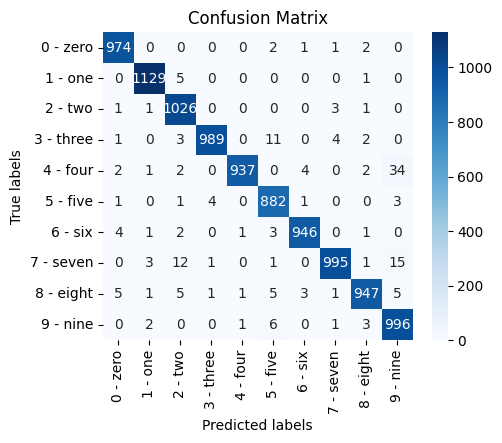

In [25]:
plot_confusion_matrix(y_true, y_pred, class_names)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

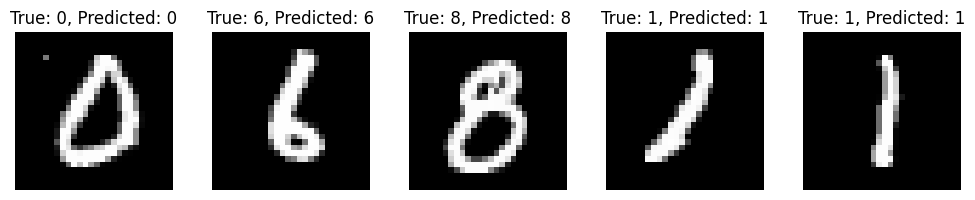

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(data[i].cpu().numpy().squeeze(), cmap="gray")
    axes[i].set_title(f"True: {target[i]}, Predicted: {pred[i][0]}")
    axes[i].axis("off")
    axes[i].set_adjustable("box")
plt.tight_layout()
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [27]:
x = torch.randn(1, 3, 64, 64)
print(x.shape)

in_channels = 3
out_channels = 64

for kernel_size in [1, 3, 5]:
    conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size,
                                                    stride=2, padding=1)
    out = conv(x)
    print(f"Kernel size: {kernel_size}, Output shape: {out.shape}")

torch.Size([1, 3, 64, 64])
Kernel size: 1, Output shape: torch.Size([1, 64, 33, 33])
Kernel size: 3, Output shape: torch.Size([1, 64, 32, 32])
Kernel size: 5, Output shape: torch.Size([1, 64, 31, 31])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 14953696.61it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 248922.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5003264.03it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11141525.80it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [30]:
fashion_mnist_class_names = train_data.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
train_fashion = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_fashion = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

In [32]:
len(train_fashion), len(test_fashion)

(1875, 313)

In [33]:
# model_2 is the same architecture as TinyVGG
model_2 = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)

model_2.to(device)

TinyVGG(
  (features): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
data, target, pred = train_model(model_2, train_fashion, test_fashion, nn.CrossEntropyLoss(),
                                 optim.SGD(model_2.parameters(), lr=0.1), device, epochs=5)

GPU is available, training is running on GPU.
Epoch 1/5, Loss: 0.241, Accuracy: 0.857, Time for epoch: 14.389 seconds
Epoch 2/5, Loss: 0.161, Accuracy: 0.874, Time for epoch: 11.096 seconds
Epoch 3/5, Loss: 0.233, Accuracy: 0.872, Time for epoch: 11.107 seconds
Epoch 4/5, Loss: 0.331, Accuracy: 0.869, Time for epoch: 11.199 seconds
Epoch 5/5, Loss: 0.344, Accuracy: 0.881, Time for epoch: 10.543 seconds
Total training time on 'cuda': 58.337 seconds


In [35]:
y_true, y_pred = evaluate_model(model_2, test_fashion, device)

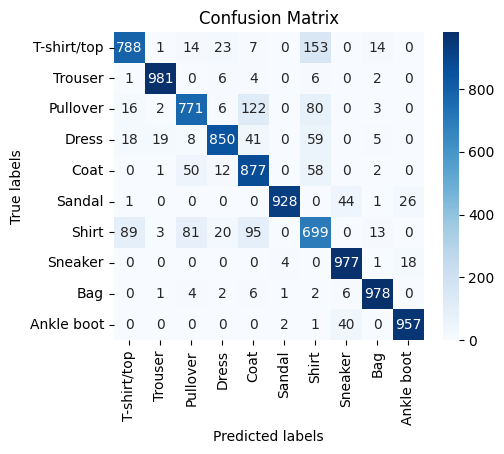

In [36]:
plot_confusion_matrix(y_true, y_pred, fashion_mnist_class_names)

In [37]:
y_pred = torch.tensor(y_pred)
y_pred[:10], len(y_pred)

<ipython-input-37-289db77e8932>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  y_pred = torch.tensor(y_pred)


(tensor([[0],
         [9],
         [9],
         [3],
         [7],
         [5],
         [5],
         [5],
         [3],
         [7]]),
 10000)

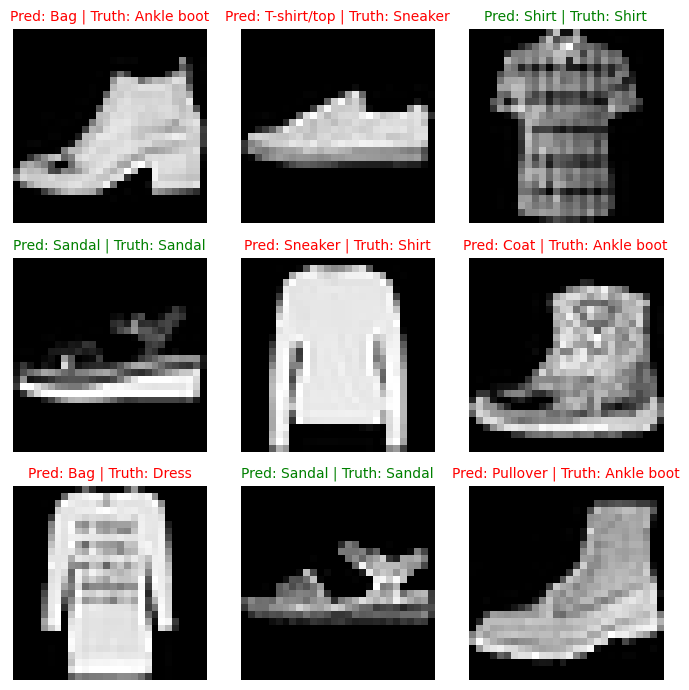

In [38]:
import random
import numpy as np

wrong_pred_indexes = np.where(y_pred != test_data.targets)[0]

random.seed(2024)
random_selection = random.sample(list(wrong_pred_indexes), k=min(9, len(wrong_pred_indexes)))

plt.figure(figsize=(7, 7))

for i, sample in enumerate(random_selection):
    truth_label = fashion_mnist_class_names[test_data[sample][1]]
    pred_label = fashion_mnist_class_names[y_pred[sample]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    plt.subplot(3, 3, i+1)
    plt.axis(False)
    plt.title(title_text, fontsize=10, c="g" if pred_label == truth_label else "r")
    plt.imshow(test_data[sample][0].squeeze(), cmap="gray")

plt.tight_layout()
plt.show()

In my opinion, the deterioration in the quality of the model is directly related to the difficulty of determining the type of clothing, because, for example, `Sneaker` and `Ankle boot` are an attribute of shoes. It is quite difficult to classify, which indicates that the data labels are too close.

The model's doubts, for example, between `Coat` and `Ankle boot` are explained by the low resolution of the training sample. We used images in size `28x28`. (in some pictures it is not easy for even the human eye to classify the object)
___  
</br>

На мой взгляд, ухудшение качества модели непосредственно связано со сложностью определения типа одежды, потому, например, `Sneaker` и `Ankle boot` - атрибут обуви. Его классифицировать достаточно тяжело, это говорит о том, что метки данных слишком близки.  

Сомнения модели, например, между `Coat` и `Ankle boot` - объясняются низким разрешением обучающей выборки. Мы использовали изображения размером `28х28`. (на некоторых картинках даже человеческому глазу непросто классифицировать объект)